In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from itertools import cycle, islice
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
day_sell_df = pd.read_csv('Day_sell_24_12_18.csv', delimiter=';', decimal=',')

In [4]:
day_sell_df.head()

,Date,zn,sb,tax,marza
0,24.12.2017,1334.95,1903.82,284.07,284.80
1,27.12.2017,2154.04,2953.43,420.77,378.62
2,28.12.2017,2120.66,2914.02,397.22,396.14
3,29.12.2017,2280.09,3152.23,409.60,462.54
4,30.12.2017,3463.87,4823.36,629.44,730.05


In [24]:
sell_df=pd.read_csv('SELL_1.csv', delimiter=';', decimal=',', encoding='latin-1')

In [6]:
sell_df.head()

,Date,PKod,Pgroup,Pname,Pquantity,pce_zn,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
0,01.01.2018,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,"1,77",1.77,2.57,2.57,2.78,2.78,0.00,31.13,0.80,0.80,0.01
1,01.01.2018,5986,CHEMISTRY,ACE 1 L,1.0,"3,2",3.20,5.68,5.68,6.99,6.99,0.01,43.66,2.48,2.48,0.03
2,01.01.2018,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
3,01.01.2018,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
4,01.01.2018,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,"2,68",10.72,2.85,11.40,3.99,11.98,0.01,5.96,0.17,0.68,0.01


In [7]:
sell_df.describe()

,PKod,Pquantity,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
count,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000
mean,8324.532916,15.967602,36.777579,4.652306,46.148053,5.310865,52.982324,0.050922,27.385324,1.110695,9.370473,0.054187
std,5508.085197,82.679277,132.469948,6.073194,151.334109,7.194647,174.597367,0.167506,12.784557,1.267487,25.658672,0.149608
min,2.000000,0.030000,0.010000,0.100000,0.100000,0.120000,0.120000,0.000000,-228.990000,-13.080000,-712.850000,-3.180000
25%,3857.000000,2.000000,4.040000,1.840000,5.700000,1.990000,6.520000,0.010000,23.305000,0.510000,1.540000,0.010000
50%,7927.500000,4.000000,9.055000,3.060000,12.845000,3.470000,14.435000,0.010000,28.460000,0.800000,3.480000,0.020000
75%,11418.000000,11.000000,21.500000,4.870000,29.880000,5.500000,33.980000,0.030000,32.950000,1.280000,8.120000,0.050000
max,19952.000000,2735.000000,3397.470000,500.000000,3923.520000,615.000000,4814.550000,4.350000,99.910000,27.660000,710.940000,4.330000


In [8]:
# checking missing values
sell_df.isnull().sum()

Date          0
PKod          0
Pgroup        0
Pname         0
Pquantity     0
pce_zn        0
pwa_zn        0
pce_sn        0
pwa_sn        0
pce_sb        0
pwa_sb        0
pudzsb        0
pmarza        0
pmarzajedn    0
pkwmarza      0
pudzmarza     0
dtype: int64

In [9]:
# Change Date format
sell_df['Date'] = pd.to_datetime(sell_df['Date'],format="%d.%m.%Y")
sell_df['Month']=sell_df['Date'].dt.strftime('%b')
sell_df['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [10]:
day_sell_df.head()

,Date,zn,sb,tax,marza
0,24.12.2017,1334.95,1903.82,284.07,284.80
1,27.12.2017,2154.04,2953.43,420.77,378.62
2,28.12.2017,2120.66,2914.02,397.22,396.14
3,29.12.2017,2280.09,3152.23,409.60,462.54
4,30.12.2017,3463.87,4823.36,629.44,730.05


In [11]:
day_sell_df.describe()

,zn,sb,tax,marza
count,3.620000e+02,3.620000e+02,3.620000e+02,362.000000
mean,1.731349e+04,6.735684e+03,3.803944e+03,1588.182762
std,2.844364e+05,6.388244e+04,6.413497e+04,19155.930624
min,3.968100e+02,5.843100e+02,8.355000e+01,-155.000000
25%,2.056903e+03,2.895847e+03,3.696375e+02,480.127500
50%,2.335280e+03,3.320945e+03,4.194400e+02,585.835000
75%,2.674117e+03,3.837975e+03,4.885275e+02,707.032500
max,5.414125e+06,1.218719e+06,1.220683e+06,365027.610000


In [12]:
# checking missing values
day_sell_df.isnull().sum()

Date     1
zn       0
sb       0
tax      0
marza    0
dtype: int64

In [13]:
columns = ['date','net_purchase','gross_sale','tax','margin']
day_sell_df.columns = columns
day_sell_df.head()

,date,net_purchase,gross_sale,tax,margin
0,24.12.2017,1334.95,1903.82,284.07,284.80
1,27.12.2017,2154.04,2953.43,420.77,378.62
2,28.12.2017,2120.66,2914.02,397.22,396.14
3,29.12.2017,2280.09,3152.23,409.60,462.54
4,30.12.2017,3463.87,4823.36,629.44,730.05


In [14]:
group = sell_df['Pgroup']
group.value_counts()

SWEETS                                       2298
DAIRY_CHESSE                                 2297
CHEMISTRY                                    2152
DRINK_JUICE                                  2044
GENERAL_FOOD                                 1956
ICE_CREAMS_FROZEN                            1334
VEGETABLES                                    940
GENERAL                                       905
BEER                                          900
KETCH_CONCETRATE_MUSTARD_MAJO_HORSERADISH     877
CIGARETTES                                    850
SPICES                                        775
GROATS_RICE_PASTA                             635
VODKA_ALCOHOL                                 627
CHIPS_FLAKES                                  509
COFFEE TEA                                    482
BREAD                                         461
MEAT                                          427
FISH                                          373
CANNED_PATE                                   361


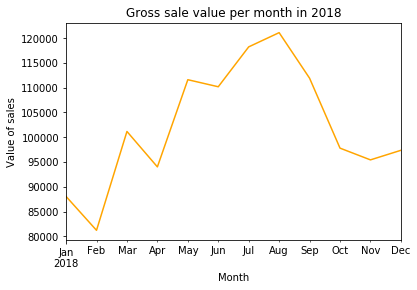

In [20]:
# Plot Sales per month
sell_df.groupby('Date')['pwa_sb'].sum().plot(color='orange')
plt.ylabel('Value of sales')
plt.xlabel('Month')
plt.title('Gross sale value per month in 2018')
plt.show()

#### What are some takeaways from the graph? 
The best sales are during the summer months and the worst sales are during the winter, especially the first two months of the year.

There seemed to be a spike in December around the holidays but it looks like overall customers like to go shopping more often when the weather is warm. 

In [25]:
day_sell_df['Date'] = pd.to_datetime(day_sell_df['Date']) 
day_sell_df.info()

# new columns for date
day_sell_df['f_year'] = day_sell_df['Date'].dt.year
day_sell_df['f_month'] = day_sell_df['Date'].dt.month
day_sell_df['f_day'] = day_sell_df['Date'].dt.day
day_sell_df['f_weekday'] = day_sell_df['Date'].dt.weekday


day_sell_df.head(6)
day_sell_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 5 columns):
Date     361 non-null datetime64[ns]
zn       362 non-null float64
sb       362 non-null float64
tax      362 non-null float64
marza    362 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.3 KB


Date         datetime64[ns]
zn                  float64
sb                  float64
tax                 float64
marza               float64
f_year              float64
f_month             float64
f_day               float64
f_weekday           float64
dtype: object

In [26]:
day_sell_df['f_year'] = day_sell_df['f_year'].astype('object')
day_sell_df['f_month'] = day_sell_df['f_month'].astype('object')
day_sell_df['f_day'] = day_sell_df['f_day'].astype('object')
day_sell_df['f_weekday'] = day_sell_df['f_weekday'].astype('object')

### <center> Figure No.1 </center>

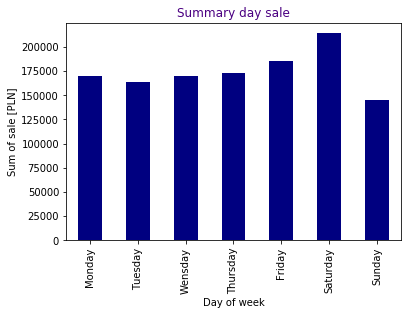

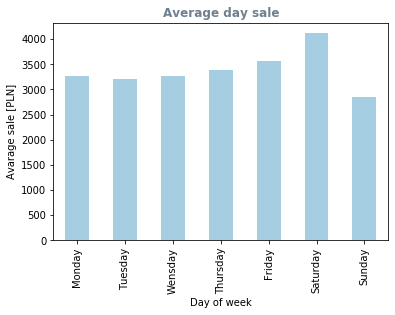

In [27]:
# 0-Monday, 1-Tuesday, 2-Wensday, 3-Thursday, 4-Friday, 5-Saturday, 6-Sunday
 
day_sell_df.groupby('f_weekday')['sb'].sum().plot.bar(color='navy')
plt.ylabel('Sum of sale [PLN]')
plt.xlabel('Day of week')
plt.title('Summary day sale', color='indigo')
bars=('Monday','Tuesday','Wensday','Thursday','Friday','Saturday','Sunday')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

#avarage
day_sell_df.groupby('f_weekday')['sb'].mean().plot.bar(colormap='Paired')
plt.ylabel('Avarage sale [PLN]')
plt.xlabel('Day of week')
plt.title('Average day sale',weight='bold', color='slategrey')
bars=('Monday','Tuesday','Wensday','Thursday','Friday','Saturday','Sunday')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

#### What are some takeaways from this graph? 
The highest sale value is on Saturday and the lowest sale is on Sunday. 

This potentially could be because the store closes 5 hours before other days

In [28]:
#change groups to one ALCOHOL
sell_df.replace(['WINE_ALCOHOL 18%', 'BEER','VODKA','VODKA_ALCOHOL'], ['ALCOHOL','ALCOHOL','ALCOHOL','ALCOHOL'], inplace=True)
sell_df.Pgroup.unique()

array(['CHEMISTRY', 'DAIRY_CHESSE', 'GENERAL_FOOD', 'SWEETS',
       'VEGETABLES', 'OILS', 'SPICES', 'TABLETS', 'BREAD',
       'ICE_CREAMS_FROZEN', 'GENERAL', 'OCCASIONAL',
       'KETCH_CONCETRATE_MUSTARD_MAJO_HORSERADISH', 'DRINK_JUICE',
       'DISHES_FOR_CHILDREN', 'ART._HYGIENIC', 'ARTICLE_OF_HOUSEHOLD',
       'COFFEE TEA', 'CIGARETTES', 'COOKIES_BULK', 'ALCOHOL',
       'CANNED_PATE', 'PACKAGES', 'CHIPS_FLAKES', 'MEAT',
       'LUNCH DINING DISHES', 'GROATS_RICE_PASTA', 'FISH',
       'CHEWING_GUM_LOLIPOPS', 'EGGS', "PET'S FOOD", 'SOCKS_THIGHTS',
       'PHONES_ADJUSTMENTS', 'MILK'], dtype=object)

### <center> Figure No.2 </center>

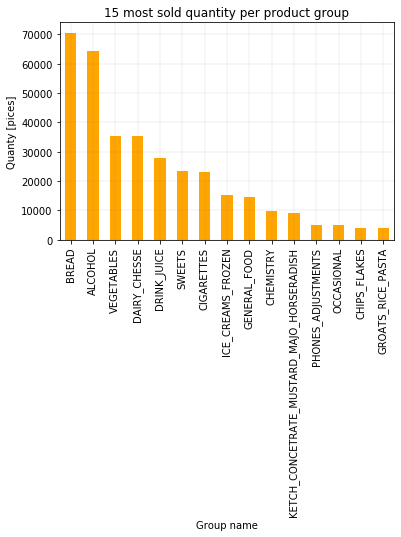

In [29]:
grouped_sell_df = sell_df.groupby('Pgroup')

# 20 the highest sell amount among product groups
sell_df_pgrupa_ilosc=grouped_sell_df['Pquantity'].sum().sort_values(ascending=False)

sell_df_pgrupa_ilosc.head(15).plot.bar(color='orange')
plt.ylabel('Quanty [pices]')
plt.xlabel('Group name')
plt.title('15 most sold quantity per product group')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

#### Takeaways from this graph: 

From this graph you can see that the items bought most often were bread, alcohol, vegetables, dairy and juice. 

This chart shows you the 15 that sell the most. 

### <center> Figure No.3 </center>

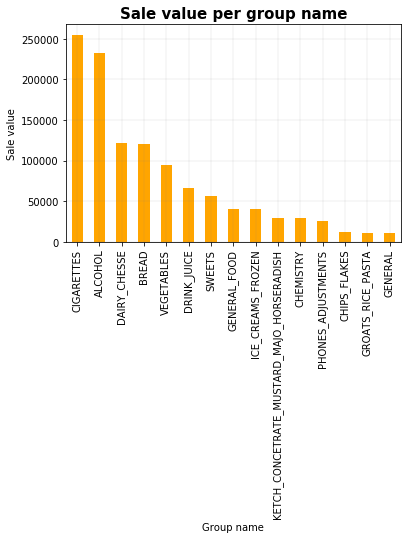

In [47]:
#bar chart 20 the most sell value product group
sell_df_pgrupa_pwasb=grouped_sell_df['pwa_sb'].sum().sort_values(ascending=False)
sell_df_pgrupa_pwasb.head(15).plot.bar(color='orange')
plt.ylabel('Sale value')
plt.xlabel('Group name')
plt.title('Sale value per group name', fontsize = 15, weight = 'bold')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

#### Takeaways from this graph: 
The highest sale value is for cigarettes, alcohol, dairy, bread and vegetables. 

### <center> Figure No.4 </center>

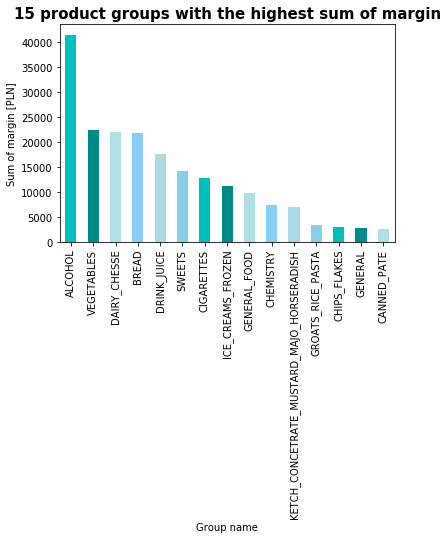

In [36]:
colors = list(islice(cycle(['c','darkcyan', 'powderblue', 'lightskyblue', 'lightblue', 'skyblue']), None, len(grouped_sell_df)))

# Graph for 15 product groups with the highest margin
marza_sum = grouped_sell_df['pkwmarza'].sum().sort_values(ascending=False)
marza_sum.head(15).plot.bar(color=colors)
plt.ylabel('Sum of margin [PLN]')
plt.xlabel('Group name')
plt.xticks(fontsize = 10)
plt.title('15 product groups with the highest sum of margin',fontsize = 15, weight = 'bold')
plt.show()

Checking margin to see if the sale values equate to more profit. 


#### Takeaways from this graph:
Cigarettes had the highest sale value but not a large sum of margin.

Alcohol group gave the shop the most amount of money.

Now, what alcohol do we sell the most of? 

### <center> Figure No.5 </center>

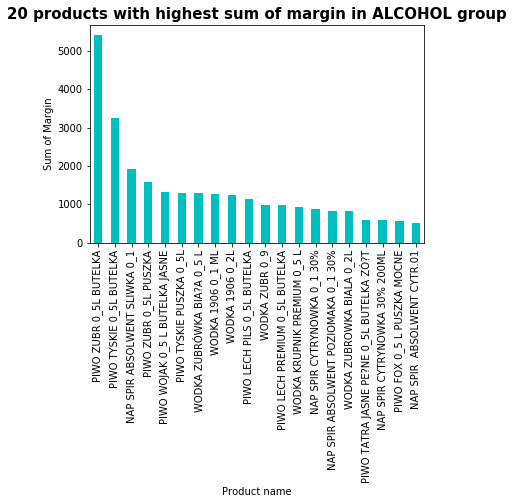

In [42]:
sell_df_alkohol= sell_df.query('Pgroup == "ALCOHOL"')
sell_df_alkohol.head()

#plot 20 products with highest sum of margin in ALCOHOL group
sell_df_alkohol1=sell_df_alkohol.groupby('Pname')['pkwmarza'].sum().sort_values(ascending=False)
sell_df_alkohol1.head()
sell_df_alkohol1.tail(10)
sell_df_alkohol1.head(20).plot.bar(color= ('c'))
plt.ylabel('Sum of Margin')
plt.xlabel('Product name')
plt.title('20 products with highest sum of margin in ALCOHOL group',color='black', fontsize = 15, weight = 'bold')
plt.show()

#### Takeaways: 
In the best seller product group, Alcohol, the types of alcohol that sell the most are beer and small bottles of vodka. (Those are cheap alcohol type)

### <center> Figure No.6 </center>

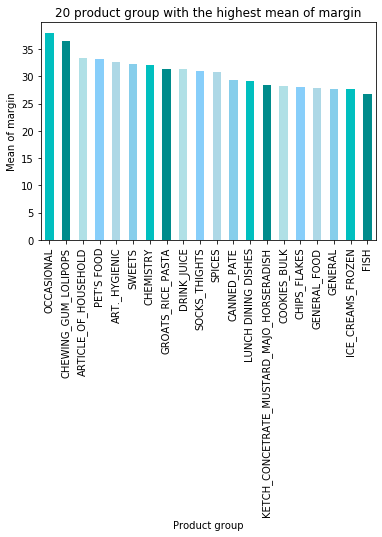

In [48]:
#graph  20 product group with the highest mean of margin in % 
marza_mean=grouped_sell_df['pmarza'].mean().sort_values(ascending=False)
marza_mean.head(20).plot.bar(color=colors)
plt.ylabel('Mean of margin')
plt.xlabel('Product group')
plt.title('20 product group with the highest mean of margin')
plt.show()